In [1968]:
import pandas as pd
import numpy as np
import os
import json
import seaborn as sns
from matplotlib import pyplot as plt
import random 
%matplotlib inline

##### Load required datasets

In [1969]:
credits = pd.read_csv("../datasets/TMDB/tmdb_5000_credits.csv")
movies = pd.read_csv("../datasets/TMDB/tmdb_5000_movies.csv")
ratings = pd.read_csv("../datasets/The_Movies/ratings_small.csv")
links = pd.read_csv("../datasets/The_Movies/links_small.csv")
movies_unchanged = movies
credits_unchanged = credits
links_unchanged = links
ratings_unchanged = ratings

In [1970]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


##### remove irrelevant features

In [1971]:
movies = movies[['genres','id','keywords','title','overview','popularity','vote_average','vote_count']]
movies.head(2)

,genres,id,keywords,title,overview,popularity,vote_average,vote_count
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,7.2,11800
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,6.9,4500


##### Rename the movie id column names , as they are different in different datasets. For TMDB using tmdbId

In [1972]:

movies = movies.rename(columns={"id":"tmdbId"})
if('title' in credits):
    credits = credits.drop(columns=["title"])
credits = credits.rename(columns={"movie_id":"tmdbId"})
credits.head()

,tmdbId,cast,crew
0,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


##### Combine movies and credits to single dataset & check if duplicates exist

In [1973]:

print("Duplicate movie id's conunt in movies df: ",movies.tmdbId.duplicated().sum())
print("Duplicate movie id's conunt in credits df: ",credits.tmdbId.duplicated().sum())
movies = movies.merge(credits,on="tmdbId")
movies.head(2)

Duplicate movie id's conunt in movies df:  0
Duplicate movie id's conunt in credits df:  0


,genres,tmdbId,keywords,title,overview,popularity,vote_average,vote_count,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


##### Check if null values exist

In [1974]:
movies.isnull().sum()

genres          0
tmdbId          0
keywords        0
title           0
overview        3
popularity      0
vote_average    0
vote_count      0
cast            0
crew            0
dtype: int64

##### Fill all null values with empty character

In [1975]:
movies = movies.fillna("")
movies.isnull().sum()

genres          0
tmdbId          0
keywords        0
title           0
overview        0
popularity      0
vote_average    0
vote_count      0
cast            0
crew            0
dtype: int64

##### check for duplicate records

In [1976]:
print("duplicated records", movies.duplicated().sum())

duplicated records 0


##### Genres data is represented in JSON format. Re-format the column values to list

In [1977]:
if(isinstance(movies.genres[0], str)):
    genreList = []
    for i in movies.genres:
        JSON = json.loads(i)
        movieGenres = []
        for j in JSON:
            movieGenres.append(j['name'])
        genreList.append(movieGenres[:5])
    movies = movies.drop(columns = ['genres'])
    movies['genres'] = pd.Series(genreList)
movies.genres.head(2)

0    [Action, Adventure, Fantasy, Science Fiction]
1                     [Adventure, Fantasy, Action]
Name: genres, dtype: object

##### Cast data is represented in JSON format. Re-format the column values to list

In [1978]:
if(isinstance(movies.cast[0], str)):
    castList = []
    for i in movies.cast:
        JSON = json.loads(i)
        movieCast = []
        for j in JSON:
            movieCast.append(j['name'])
        castList.append(movieCast[:5])
    movies = movies.drop(columns = ['cast'])
    movies['cast'] = pd.Series(castList)
movies.cast.head(2)

0    [Sam Worthington, Zoe Saldana, Sigourney Weave...
1    [Johnny Depp, Orlando Bloom, Keira Knightley, ...
Name: cast, dtype: object

##### Sample List of crew members  job role in a movie

In [1979]:
JSON = json.loads(credits_unchanged.crew[0])
jobs = []
for j in JSON:
    jobs.append(j['job'])
print(set(jobs))

{'Choreographer', 'Sound Designer', 'Set Designer', 'Writer', 'Set Costumer', 'Best Boy Electric', 'Art Department Coordinator', 'Stunt Coordinator', 'Animation Director', 'Hairstylist', 'Visual Effects Art Director', 'Conceptual Design', 'Post Production Supervisor', 'Director of Photography', 'Assistant Art Director', 'Producer', 'Executive Producer', 'Digital Intermediate', 'Transportation Coordinator', 'Casting', 'Music Editor', 'Motion Capture Artist', 'Construction Coordinator', 'Original Music Composer', 'Art Direction', 'Art Department Manager', 'Production Supervisor', 'Publicist', 'Steadicam Operator', 'Special Effects Coordinator', 'Foley', 'Director', 'Stunts', 'Set Decoration', 'Editor', 'Screenplay', 'Makeup Artist', 'Dialogue Editor', 'Still Photographer', 'Dialect Coach', 'Lighting Technician', 'Supervising Art Director', 'Makeup Department Head', 'Costume Design', 'Camera Operator', 'Lighting Artist', 'Visual Effects Producer', 'Sound Effects Editor', 'Sound Re-Recordi

##### Crew data is represented in JSON format & there are several crew job positions available. Select Director role which we use for prediction

In [1980]:
if(('crew' in movies) and (isinstance(movies.crew[0], str))):
    directorList = []
    for i in movies.crew:
        JSON = json.loads(i)
        movieDirectors = []
        for j in JSON:
            if(j['job'] == 'Director'):
                movieDirectors.append(j['name'])
        directorList.append(movieDirectors[:5])
    movies = movies.drop(columns = ['crew'])
    movies['directors'] = pd.Series(directorList)
movies['directors']

0                                [James Cameron]
1                               [Gore Verbinski]
2                                   [Sam Mendes]
3                            [Christopher Nolan]
4                               [Andrew Stanton]
                          ...                   
4798                          [Robert Rodriguez]
4799                              [Edward Burns]
4800                               [Scott Smith]
4801                               [Daniel Hsia]
4802    [Brian Herzlinger, Jon Gunn, Brett Winn]
Name: directors, Length: 4803, dtype: object

##### Similarly clean keywords column data

In [1981]:
if(isinstance(movies.keywords[0], str)):
    keywordsList = []
    for i in movies.keywords:
        JSON = json.loads(i)
        movieKeywords = []
        for j in JSON:
            movieKeywords.append(j['name'])
        keywordsList.append(movieKeywords[:5])
    movies = movies.drop(columns = ['keywords'])
    movies['keywords'] = pd.Series(keywordsList)
movies.keywords.head(2)

0    [culture clash, future, space war, space colon...
1    [ocean, drug abuse, exotic island, east india ...
Name: keywords, dtype: object

##### Function to merge multiple words in name field to avoid partial names as common features 

In [1982]:
def formatData(column):
    movies[column] = [[str.lower(j.replace(" ", "_")) for j in i ] for i in movies[column]]

##### format keywords, cast, directors, genres

In [1983]:
formatData('keywords')
formatData('cast')
formatData('directors')
formatData('genres')
movies.head(2)

,tmdbId,title,overview,popularity,vote_average,vote_count,genres,cast,directors,keywords
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,7.2,11800,"[action, adventure, fantasy, science_fiction]","[sam_worthington, zoe_saldana, sigourney_weave...",[james_cameron],"[culture_clash, future, space_war, space_colon..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,6.9,4500,"[adventure, fantasy, action]","[johnny_depp, orlando_bloom, keira_knightley, ...",[gore_verbinski],"[ocean, drug_abuse, exotic_island, east_india_..."


#### Combine all the extracted features to a single column which we use it for prediction. 

In [1984]:
movies['content'] = (movies['keywords'] + movies['cast'] + movies['directors'] + movies['genres'])
movies['content'] = movies['content'].apply(lambda x: ' '.join(x))
movies['content'][0]

'culture_clash future space_war space_colony society sam_worthington zoe_saldana sigourney_weaver stephen_lang michelle_rodriguez james_cameron action adventure fantasy science_fiction'

In [1985]:
links.head(2)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0


In [1986]:
movies.head(2)

,tmdbId,title,overview,popularity,vote_average,vote_count,genres,cast,directors,keywords,content
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,7.2,11800,"[action, adventure, fantasy, science_fiction]","[sam_worthington, zoe_saldana, sigourney_weave...",[james_cameron],"[culture_clash, future, space_war, space_colon...",culture_clash future space_war space_colony so...
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,6.9,4500,"[adventure, fantasy, action]","[johnny_depp, orlando_bloom, keira_knightley, ...",[gore_verbinski],"[ocean, drug_abuse, exotic_island, east_india_...",ocean drug_abuse exotic_island east_india_trad...


##### Merge Movies with links.csv to get the corresponding movieId and imdbId of each movie in TMDB dataset

In [1987]:
movies = movies.merge(links,on='tmdbId')
movies.head(2)

,tmdbId,title,overview,popularity,vote_average,vote_count,genres,cast,directors,keywords,content,movieId,imdbId
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,7.2,11800,"[action, adventure, fantasy, science_fiction]","[sam_worthington, zoe_saldana, sigourney_weave...",[james_cameron],"[culture_clash, future, space_war, space_colon...",culture_clash future space_war space_colony so...,72998,499549
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,6.9,4500,"[adventure, fantasy, action]","[johnny_depp, orlando_bloom, keira_knightley, ...",[gore_verbinski],"[ocean, drug_abuse, exotic_island, east_india_...",ocean drug_abuse exotic_island east_india_trad...,53125,449088


##### Few movies that are present in TMDB dataset are not present in Ratings dataset. So After joining these two datasets the final movies count is reduced. 

In [1988]:
ids = ratings['movieId'].unique()
movies = movies[movies['movieId'].isin(ids)]
movies = movies.reset_index(drop=True)
movies.shape

(3394, 13)

##### Merge TMDB dataset with Ratings dataset

In [1989]:
movieRatings = movies.merge(ratings,on='movieId')
movieRatings.head(2)

,tmdbId,title,overview,popularity,vote_average,vote_count,genres,cast,directors,keywords,content,movieId,imdbId,userId,rating,timestamp
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,7.2,11800,"[action, adventure, fantasy, science_fiction]","[sam_worthington, zoe_saldana, sigourney_weave...",[james_cameron],"[culture_clash, future, space_war, space_colon...",culture_clash future space_war space_colony so...,72998,499549,15,4.0,1261944230
1,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,7.2,11800,"[action, adventure, fantasy, science_fiction]","[sam_worthington, zoe_saldana, sigourney_weave...",[james_cameron],"[culture_clash, future, space_war, space_colon...",culture_clash future space_war space_colony so...,72998,499549,26,3.5,1352597807


##### keep only relevant features for movie ratings dataset

In [1990]:
movieRatings = movieRatings[['tmdbId','movieId','title','userId','rating']]
movieRatings.head()

,tmdbId,movieId,title,userId,rating
0,19995,72998,Avatar,15,4.0
1,19995,72998,Avatar,26,3.5
2,19995,72998,Avatar,31,4.0
3,19995,72998,Avatar,48,4.5
4,19995,72998,Avatar,72,2.0


In [1991]:
movieRatings.isna().sum()

tmdbId     0
movieId    0
title      0
userId     0
rating     0
dtype: int64

In [1992]:
print('total movies in TMDB dataset after merge: ' ,len(movies.tmdbId.unique()))

total movies in TMDB dataset after merge:  3394


In [1993]:
print('total movies in Ratings dataset after merge: ', len(movieRatings.tmdbId.unique()))

total movies in Ratings dataset after merge:  3394


In [1994]:
print('initial movies count in Ratings dataset : ', len(ratings.movieId.unique()))

initial movies count in Ratings dataset :  9066


In [1995]:
movieRatings

,tmdbId,movieId,title,userId,rating
0,19995,72998,Avatar,15,4.0
1,19995,72998,Avatar,26,3.5
2,19995,72998,Avatar,31,4.0
3,19995,72998,Avatar,48,4.5
4,19995,72998,Avatar,72,2.0
...,...,...,...,...,...
66942,9367,3267,El Mariachi,460,3.5
66943,9367,3267,El Mariachi,580,4.0
66944,9367,3267,El Mariachi,596,3.5
66945,9367,3267,El Mariachi,624,3.5


##### plot histogram for user rated movies

<AxesSubplot:xlabel='rating', ylabel='Count'>

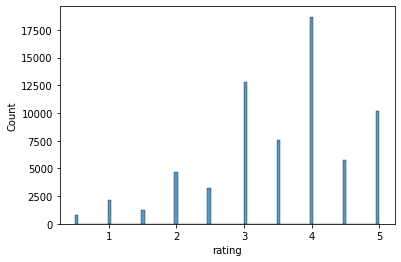

In [1996]:
sns.histplot(movieRatings["rating"],)

In [1997]:
print("Total no of users : " , np.count_nonzero(movieRatings['userId'].unique()))

Total no of users :  671


In [1998]:
print("Total no of movies : " , np.count_nonzero(movieRatings['tmdbId'].unique()))

Total no of movies :  3394


##### Creating a random user 

In [1999]:
randomUser = random.choice(movieRatings['userId'])
ratedMovies = movieRatings[movieRatings['userId']==randomUser]
avgRating = np.mean(ratedMovies['rating'])
topRatedMovies = ratedMovies[ratedMovies['rating']>avgRating]
topRatedMovies = topRatedMovies.sort_values(['rating'],ascending=False)
print("userId : ", randomUser)
print("total movies rated : ",len(ratedMovies))
print("avg ratings :" , avgRating)
topRatedMovies['title'].head()

userId :  654
total movies rated :  479
avg ratings : 4.065762004175365


681                                 Titanic
16243                             Apollo 13
41643                   Edward Scissorhands
40995    Close Encounters of the Third Kind
40898               Raiders of the Lost Ark
Name: title, dtype: object

##### Create a map for fetching index using movieId

In [2000]:
movieIdIndex = pd.Series(movies.index, index=movies['movieId'])
movieIdIndex.head()

movieId
72998     0
53125     1
136020    2
91529     3
93363     4
dtype: int64

##### Create a map for fetching index using tmdbId

In [2001]:
tmdbIdIndex = pd.Series(movies.index, index=movies['tmdbId'])
tmdbIdIndex.head()

tmdbId
19995     0
285       1
206647    2
49026     3
49529     4
dtype: int64

##### Recommend movies based on the popularity score of each movie. Used if user in new or has no ratings. 

In [2002]:
def getPopularMovies():
    popular = movies.sort_values(['popularity'],ascending=False)
    popular = popular[['tmdbId','title','popularity']]
    return popular[:10]
getPopularMovies().head()

,tmdbId,title,popularity
516,211672,Minions,875.581305
94,157336,Interstellar,724.247784
741,293660,Deadpool,514.569956
93,118340,Guardians of the Galaxy,481.098624
124,76341,Mad Max: Fury Road,434.278564


### Content based recommendation system implementation

##### import Tfidf vectorizer for creating word frequencies that are used to measure similarty between movies.

In [2003]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

In [2004]:
movies['overview'].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

##### TfidfVectorizer generates a mxn matrix with m equal to the total rows of  dataset & n is total no of different words used in overview column. Using this matrix we can find the similarity among the movies 

In [2005]:
tfidf = TfidfVectorizer(stop_words='english')
overviewMatrix = tfidf.fit_transform(movies['overview'])
print("shape", overviewMatrix.shape)
overviewMatrix

shape (3394, 17282)


<3394x17282 sparse matrix of type '<class 'numpy.float64'>'
	with 88140 stored elements in Compressed Sparse Row format>

##### Used cosine similarity to find the similarity among movies. It generates a matrix with similarity scores mapping with all movies in dataset

In [2006]:
overviewSimilarity = cosine_similarity(overviewMatrix, overviewMatrix)
pd.DataFrame(overviewSimilarity)

,0,1,2,3,4,5,6,7,8,9,...,3384,3385,3386,3387,3388,3389,3390,3391,3392,3393
0,1.000000,0.000000,0.000000,0.026102,0.000000,0.028660,0.000000,0.039429,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.043716,0.000000
1,0.000000,1.000000,0.000000,0.000000,0.032127,0.000000,0.000000,0.021380,0.000000,0.000000,...,0.019819,0.0,0.000000,0.012739,0.010673,0.000000,0.0,0.000000,0.000000,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.032868,0.026059,0.000000,...,0.017643,0.0,0.000000,0.000000,0.000000,0.029308,0.0,0.000000,0.000000,0.000000
3,0.026102,0.000000,0.000000,1.000000,0.010712,0.005312,0.013048,0.025608,0.020884,0.129094,...,0.013374,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,0.000000,0.032127,0.000000,0.010712,1.000000,0.000000,0.009462,0.036849,0.000000,0.018044,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389,0.000000,0.000000,0.029308,0.000000,0.000000,0.017892,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.050474,0.000000,0.000000
3390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
3391,0.000000,0.000000,0.000000,0.000000,0.000000,0.017251,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.050474,0.0,1.000000,0.000000,0.033733
3392,0.043716,0.000000,0.000000,0.000000,0.000000,0.022191,0.000000,0.050031,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000


##### Similar score matrix data can be fetched by using index of the required row. So if user searches for a particular movie, we need to get the index of that movie and then get the similartiy scores data. For this conversion instead of converting each time during search we can make use of reverse map to store tiles as key & index as values. 
Once we get similarity scores for a particular movie, we need to sort them to find top 10 similar movies indices & then fetch the titles to recommend to the user. As any movie will have 1 as similarity score when compared with itself, its own index appears at top of list. So we ignore it and take next 10 items from the results. 

##### An example of fetching similar movies for index 0 

In [2007]:
#Similarity for Avatar movie 
sim_sorted = np.argsort(overviewSimilarity[0])
#top 10 
sim_indices = sim_sorted[::-1][:11]
#titles
sim_titles = movies.iloc[sim_indices]['title']
sim_titles[1:]

1875                    The American
597                       The Matrix
499                 Tears of the Sun
1466                           Hanna
298     The Adventures of Pluto Nash
883                 The Book of Life
731                        Supernova
798                         Semi-Pro
2319                   Birthday Girl
962                         Insomnia
Name: title, dtype: object

##### provided movieId and the similarity matrix, this function returns the top 10 similar movies 

In [2008]:
def getTopSimilarMovies(movieId,similarity):
    moviesLimit = 3
    index = movieIdIndex[movieId]
    scores = similarity[index]
    score_sorted = np.sort(scores)
    score_index = np.argsort(scores)
    top = score_index[::-1][1:moviesLimit+1]
    recommendations = np.array(movies.iloc[top]['movieId'])
    return recommendations,score_sorted[::-1][1:moviesLimit+1]

##### provided userID and the similarity matrix, this function returns movie ids along with scores that have similarities with user top rated movies

In [2009]:
def contentBasedRecom(randomUser,similarity):
    likedMovies = ratedMovies[ratedMovies['rating'] >= np.mean(ratedMovies['rating']) ]
    #topRatedMovies = ratedMovies.sort_values(['rating'],ascending=False)
    #if()
    ids = likedMovies['movieId']
    moviesDict = dict()
    for i in ids:
        movies,score = getTopSimilarMovies(i,similarity)
        for j in range(len(movies)):
            if(movies[j] in moviesDict):
                if(moviesDict[movies[j]] < score[j]):
                    moviesDict.update({movies[j]:score[j]})
            else:
                moviesDict[movies[j]] = score[j]
    duplicates = []
    for i in moviesDict:
        if(i in ratedMovies['movieId']):
            duplicates.append(i)
    for i in duplicates:
        moviesDict.pop(i)
    return moviesDict

##### Function to generate a list of movies that have similarities with top rated movies of user. 

In [2010]:
def getContentRecomMovies(user,similarity):
    moviesDict = contentBasedRecom(user,similarity)
    recommendedMovieIds = moviesDict.keys()
    contentRecomIds = np.array(list(recommendedMovieIds))
    contentRecomDf = pd.DataFrame({'movieId':moviesDict.keys(),'score':moviesDict.values()})
    contentRecomDf = contentRecomDf.sort_values('score',ascending=False)
    contentRecomTitles = []
    for i in contentRecomIds:
        contentRecomTitles.append(movies['title'].iloc[movieIdIndex[i]])
    contentRecomDf['titles'] = contentRecomTitles
    contentRecomDf.head()
    return contentRecomDf

##### Get recommendation using overview column data. 

In [2011]:
overviewRecommended = getContentRecomMovies(randomUser, overviewSimilarity)
overviewRecommended

,movieId,score,titles
64,78499,0.507642,Ghost Ship
109,53121,0.484204,Niagara
408,136598,0.463754,Event Horizon
63,1,0.437274,Spider-Man 3
261,3114,0.437274,Spider-Man
...,...,...,...
45,1215,0.078788,A Man for All Seasons
198,94018,0.077790,Three Men and a Baby
281,5419,0.077485,Payback
47,112749,0.076927,Be Kind Rewind


##### distribution of the scores of the recommended movies using overview. 

<AxesSubplot:xlabel='score', ylabel='Count'>

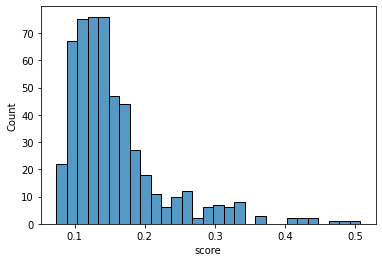

In [2012]:
sns.histplot(overviewRecommended['score'])

##### Creating similarty scores for movies using content column 

In [2013]:
contentMatrix = tfidf.fit_transform(movies['content'])
contentSimilarity = cosine_similarity(contentMatrix,contentMatrix)

In [2014]:
contentMatrix

<3394x12500 sparse matrix of type '<class 'numpy.float64'>'
	with 45126 stored elements in Compressed Sparse Row format>

In [2015]:
pd.DataFrame(contentSimilarity)

,0,1,2,3,4,5,6,7,8,9,...,3384,3385,3386,3387,3388,3389,3390,3391,3392,3393
0,1.000000,0.039005,0.022644,0.010369,0.038404,0.040423,0.0,0.041802,0.029744,0.042201,...,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013295,0.007773
1,0.039005,1.000000,0.022605,0.010351,0.021779,0.150126,0.0,0.023706,0.029693,0.042129,...,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007759
2,0.022644,0.022605,1.000000,0.027680,0.055377,0.023428,0.0,0.085812,0.012683,0.024458,...,0.00000,0.0,0.000000,0.000000,0.000000,0.013566,0.000000,0.043582,0.000000,0.020749
3,0.010369,0.010351,0.027680,1.000000,0.010780,0.010728,0.0,0.011734,0.000000,0.086262,...,0.00000,0.0,0.000000,0.005759,0.112284,0.014218,0.006695,0.024554,0.013516,0.030382
4,0.038404,0.021779,0.055377,0.010780,1.000000,0.110970,0.0,0.043459,0.012219,0.023563,...,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.028444,0.013821,0.008081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389,0.000000,0.000000,0.013566,0.014218,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.00863,0.0,0.005989,0.005852,0.006902,1.000000,0.000000,0.029263,0.000000,0.010658
3390,0.000000,0.000000,0.000000,0.006695,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.00000,0.0,0.000000,0.005646,0.000000,0.000000,1.000000,0.000000,0.004932,0.000000
3391,0.000000,0.000000,0.043582,0.024554,0.028444,0.000000,0.0,0.000000,0.000000,0.000000,...,0.00000,0.0,0.000000,0.000000,0.000000,0.029263,0.000000,1.000000,0.007234,0.018406
3392,0.013295,0.000000,0.000000,0.013516,0.013821,0.000000,0.0,0.015045,0.000000,0.000000,...,0.00000,0.0,0.000000,0.004242,0.000000,0.000000,0.004932,0.007234,1.000000,0.006361


##### Get recommendations using content column of the dataset

In [2016]:
contentRecommended = getContentRecomMovies(randomUser, contentSimilarity)
contentRecommended

,movieId,score,titles
18,3793,0.994320,The Day the Earth Stood Still
36,5952,0.912415,Revolutionary Road
37,7153,0.912415,Flushed Away
53,4993,0.813651,Spider-Man 3
118,6934,0.802803,Spider-Man
...,...,...,...
427,39234,0.099503,Time Bandits
471,6888,0.099357,The Fisher King
201,47384,0.099085,The Imaginarium of Doctor Parnassus
472,50802,0.089655,Mr. & Mrs. Smith


##### distribution of the scores of the recommended movies using content. 

<AxesSubplot:xlabel='score', ylabel='Count'>

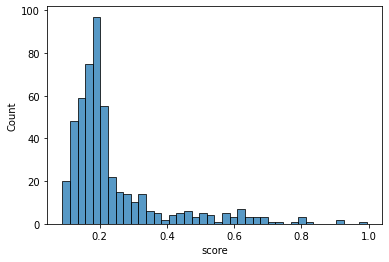

In [2017]:
sns.histplot(contentRecommended['score'])

### Item-Item Similarity implementation

##### create a copy of movies dataset for similarity calculations.

In [2018]:
moviesItemSimilarity = movies
moviesItemSimilarity = moviesItemSimilarity[['movieId','title']]
moviesItemSimilarity

,movieId,title
0,72998,Avatar
1,53125,Pirates of the Caribbean: At World's End
2,136020,Spectre
3,91529,The Dark Knight Rises
4,93363,John Carter
...,...,...
3389,2361,Pink Flamingos
3390,4252,The Circle
3391,4645,Cure
3392,8914,Primer


In [2019]:
pd.options.mode.chained_assignment = None
ratingsMatrix = movieRatings.pivot_table(index=['movieId'],columns=['userId'],values='rating').reset_index(drop=True)
ratingsMatrix.fillna( 0, inplace = True )
ratingsMatrix.shape

(3394, 671)

In [2020]:
ratingsMatrix

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,...,0.0,4.0,3.5,0.0,0.0,0.0,0.0,0.0,4.0,5.0
1,0.0,4.0,0.0,4.0,0.0,0.0,3.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### build pairwise distances for the ratings matrix

In [2021]:
from sklearn.metrics import pairwise_distances
similarityScore = 1 - pairwise_distances(ratingsMatrix.values, metric="cosine" )
np.fill_diagonal( similarityScore, 0 )
ratingsMatrix = pd.DataFrame( similarityScore )
ratingsMatrix

,0,1,2,3,4,5,6,7,8,9,...,3384,3385,3386,3387,3388,3389,3390,3391,3392,3393
0,0.000000,0.310689,0.328194,0.190222,0.170197,0.323016,0.349109,0.185447,0.304818,0.069941,...,0.031902,0.010088,0.031902,0.076528,0.031902,0.031902,0.059610,0.079755,0.085111,0.031902
1,0.310689,0.000000,0.282299,0.070908,0.167087,0.292487,0.213907,0.110895,0.395150,0.193054,...,0.076835,0.024297,0.076835,0.108420,0.076835,0.076835,0.000000,0.102446,0.018635,0.076835
2,0.328194,0.282299,0.000000,0.174079,0.280351,0.302430,0.439799,0.070777,0.318942,0.116850,...,0.072755,0.023007,0.072755,0.054753,0.072755,0.072755,0.000000,0.000000,0.017646,0.072755
3,0.190222,0.070908,0.174079,0.000000,0.074336,0.200522,0.285344,0.151400,0.063116,0.042547,...,0.127000,0.040161,0.127000,0.095577,0.127000,0.127000,0.000000,0.000000,0.030802,0.127000
4,0.170197,0.167087,0.280351,0.074336,0.000000,0.070714,0.182653,0.013714,0.125502,0.180230,...,0.000000,0.000000,0.000000,0.200749,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389,0.031902,0.076835,0.072755,0.127000,0.000000,0.092257,0.080243,0.000000,0.037088,0.000000,...,1.000000,0.316228,1.000000,0.752577,1.000000,0.000000,0.000000,0.000000,0.242536,1.000000
3390,0.059610,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.725094,0.000000
3391,0.079755,0.102446,0.000000,0.000000,0.000000,0.131796,0.000000,0.000000,0.074176,0.295599,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3392,0.085111,0.018635,0.017646,0.030802,0.000000,0.022376,0.019462,0.000000,0.008995,0.000000,...,0.242536,0.076696,0.242536,0.182527,0.242536,0.242536,0.725094,0.000000,0.000000,0.242536


##### get the similarity scores for item-item filtering 

In [2022]:
def getItemSimilarity(movieId): 
    index=moviesItemSimilarity[moviesItemSimilarity['movieId']==movieId].index.tolist()
    index=index[0]
    score = ratingsMatrix.iloc[index]
    moviesItemSimilarity['similarity'] = np.array(score)
    moviesItemSimilarity.columns = ['movieId', 'title', 'similarity']

##### get movies based on item similarity

In [2023]:
def getItemSimilarityRecom(user_id):
    userRatedMovies= movieRatings[(movieRatings.userId==user_id) & (movieRatings.rating > 4)]
    userRatedMovies=userRatedMovies['movieId'].iloc[0]
    getItemSimilarity(userRatedMovies)
    sortedMovies=moviesItemSimilarity.sort_values(["similarity"], ascending = False )
    userRatings= ratings[ratings['userId']== user_id]['movieId']
    recommendations = []
    for movieId in sortedMovies['movieId']:
        if movieId not in userRatings:
              recommendations.append(movieId)
    return recommendations[1:11]

In [2024]:
def movieIdToTitle(listMovieIDs):
    titles= []
    for id in listMovieIDs:
        titles.append(movies.iloc[movieIdIndex[id]].title)
    return titles

##### display item similarty recommendation for the created random user 

In [2025]:
movieIdToTitle(getItemSimilarityRecom(randomUser))

['Captain America: The First Avenger',
 'Batman Begins',
 'Clash of the Titans',
 'RoboCop',
 "Harry Potter and the Philosopher's Stone",
 'The Da Vinci Code',
 'Speed 2: Cruise Control',
 'Quantum of Solace',
 'X2',
 'Ghost Rider']

### user item similarity implementation. 

In [2026]:
ratingsUsersMatrix = movieRatings.pivot_table(index=['userId'],columns=['movieId'],values='rating',fill_value=0).reset_index(drop=True)
ratingsUsersMatrix

movieId,1,10,11,14,15,16,17,18,19,20,...,158528,159093,159690,159858,160080,160271,160438,160440,160563,160565
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0,0.0,0.0,0.0,0,0
1,0.0,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0,0.0,0.0,0.0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0,0.0,0.0,0.0,0,0
3,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0,0.0,0.0,0.0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,0.0,0.0,3.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0,0.0,0.0,0.0,0,0
667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0,0.0,0.0,0.0,0,0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0,0.0,0.0,0.0,0,0
669,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0,0.0,0.0,0.0,0,0


In [2027]:
similarityScore = cosine_similarity(ratingsUsersMatrix.to_numpy())
np.fill_diagonal( similarityScore, 0 )
ratingsUsersMatrix = pd.DataFrame( similarityScore )
ratingsUsersMatrix

,0,1,2,3,4,5,6,7,8,9,...,661,662,663,664,665,666,667,668,669,670
0,0.000000,0.000000,0.000000,0.084333,0.025645,0.000000,0.076257,0.000000,0.019779,0.000000,...,0.000000,0.000000,0.021369,0.038632,0.000000,0.000000,0.000000,0.093389,0.000000,0.026224
1,0.000000,0.000000,0.161424,0.171523,0.137666,0.000000,0.230059,0.149463,0.152033,0.060426,...,0.600587,0.083067,0.099985,0.193333,0.605019,0.520414,0.090347,0.031211,0.217209,0.123673
2,0.000000,0.161424,0.000000,0.102507,0.167911,0.074611,0.189243,0.279033,0.158645,0.141017,...,0.188232,0.074203,0.193247,0.194901,0.202305,0.189057,0.157449,0.092082,0.152963,0.195753
3,0.084333,0.171523,0.102507,0.000000,0.113360,0.075557,0.452839,0.251736,0.026628,0.190097,...,0.166791,0.067512,0.166016,0.250716,0.180144,0.140719,0.106759,0.120491,0.075490,0.272246
4,0.025645,0.137666,0.167911,0.113360,0.000000,0.060932,0.097948,0.159143,0.090336,0.040711,...,0.211535,0.024993,0.157786,0.243658,0.158209,0.075139,0.055337,0.044606,0.071737,0.243898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,0.000000,0.520414,0.189057,0.140719,0.075139,0.000000,0.224355,0.077071,0.055005,0.012314,...,0.454332,0.077958,0.088517,0.148757,0.471661,0.000000,0.076715,0.027827,0.141038,0.103027
667,0.000000,0.090347,0.157449,0.106759,0.055337,0.026543,0.047438,0.109923,0.147954,0.133763,...,0.102819,0.075274,0.116110,0.118557,0.150970,0.076715,0.000000,0.000000,0.141421,0.104791
668,0.093389,0.031211,0.092082,0.120491,0.044606,0.030087,0.093206,0.063749,0.034402,0.074128,...,0.019980,0.029864,0.087743,0.126636,0.034226,0.027827,0.000000,0.000000,0.047498,0.097561
669,0.000000,0.217209,0.152963,0.075490,0.071737,0.023461,0.120757,0.263910,0.394333,0.191272,...,0.226421,0.138390,0.128285,0.173308,0.186816,0.141038,0.141421,0.047498,0.000000,0.234150


In [2028]:
similarUsers = ratingsUsersMatrix.idxmax(axis='columns')

In [2029]:
similarUsers = pd.DataFrame( similarUsers , columns=['similarUser'])
similarUsers

,similarUser
0,324
1,368
2,378
3,136
4,312
...,...
666,160
667,453
668,625
669,8


##### get recommendations using user-item similartiy

In [2030]:
def getUserSimilarityRecom (userId):
    userRatings = ratings[ratings['userId']== userId]['movieId']
    similarUser=similarUsers.iloc[0,0]
    recommended=pd.DataFrame(columns=['movieId','title','genres','userId','rating','timestamp'])
    for movieId in ratings[ratings['userId']== similarUser]['movieId']:
        if movieId not in userRatings:
            unwatchedMovie = movieRatings[(movieRatings.userId==similarUser) & (movieRatings.movieId==movieId)]
            recommended=pd.concat([recommended,unwatchedMovie])
        TopRecommended =recommended.sort_values(['rating'], ascending = False )[1:10]  
    return TopRecommended['movieId']

In [2031]:
userSimilarityMovies = movieIdToTitle(getUserSimilarityRecom (randomUser))
print("Top suggested movies are :\n")
print(userSimilarityMovies)

Top suggested movies are :

['The Princess Bride', 'How the Grinch Stole Christmas', 'Toy Story', 'Cast Away', 'Rain Man', 'Saving Private Ryan', 'Beetlejuice', 'Office Space', 'Indiana Jones and the Kingdom of the Crystal Skull']


### SVD model implementation

###### Import SVD libraries for Model based recommendation implementation.

In [2032]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate, KFold

In [2033]:
reader = Reader()
ratings = pd.read_csv('../datasets/The_Movies/ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


##### load user ratings dataset

In [2034]:
userRating = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

##### Build SVD model and test the accuracy of the model using Root Mean Square error 

In [2035]:
svd = SVD()
cross_validate(svd, userRating, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8954  0.8870  0.8992  0.8980  0.9007  0.8961  0.0049  
MAE (testset)     0.6906  0.6841  0.6943  0.6908  0.6931  0.6906  0.0035  
Fit time          5.30    5.31    5.53    5.72    5.53    5.48    0.16    
Test time         0.27    0.25    0.22    0.23    0.28    0.25    0.02    


{'test_rmse': array([0.89544612, 0.88695631, 0.89923337, 0.89803435, 0.90074653]),
 'test_mae': array([0.69060844, 0.68407616, 0.69427005, 0.69082127, 0.69309457]),
 'fit_time': (5.3020851612091064,
  5.312089920043945,
  5.53084397315979,
  5.719723701477051,
  5.533884525299072),
 'test_time': (0.26839661598205566,
  0.24557805061340332,
  0.21905994415283203,
  0.23341584205627441,
  0.2762317657470703)}

###### Train SVD with full trainset

In [2036]:
trainset = userRating.build_full_trainset()
svd.fit(trainset)

###### choose random movie id from dataset and calculate the score for the previously selected random user

In [2037]:
randomMovieId = random.choice(movieRatings['movieId'])
movieRatings.iloc[movieIdIndex[randomMovieId]].title

'Terminator Genisys'

##### prediction using SVD model for random movie ID

In [2038]:
svdPrediction = svd.predict(randomUser, randomMovieId)
svdPrediction.est

4.002774143079089

### Hybrid model implementation

#### function to implement hybrid model implementation. uses content based recommendation as well as SVD to recommend movies to user

In [2039]:
def getHybrdRecommendations(userId):
    contentRecommended = getContentRecomMovies(userId, contentSimilarity)
    #sns.histplot(contentRecommended['score'])
    svdRatings = []
    indexMap = pd.Series(contentRecommended.index, index=contentRecommended['movieId'])
    for movie in contentRecommended['movieId']:
        prediction = svd.predict(randomUser, movie)
        svdRatings.append((prediction.est + contentRecommended.iloc[indexMap[movie]].score)*(5/6))
    hybridRecommended = contentRecommended
    hybridRecommended['score'] = svdRatings
    sns.histplot(hybridRecommended['score'])
    hybridRecommended = hybridRecommended.sort_values(['score'],ascending=False)
    return hybridRecommended[:11]

##### create random user & fetch user data to test the model 

In [2040]:
randomUser = random.choice(movieRatings['userId'])
ratedMovies = movieRatings[movieRatings['userId']==randomUser]
avgRating = np.mean(ratedMovies['rating'])
topRatedMovies = ratedMovies
topRatedMovies = topRatedMovies.sort_values(['rating'],ascending=False)
print("userId : ", randomUser)
print("Total movies rated : ",len(ratedMovies))
print("Avg ratings :" , avgRating)
print("Top rated movies: ")
topRatedMovies['title'][:20]

userId :  188
Total movies rated :  64
Avg ratings : 3.671875
Top rated movies: 


64370    Snow White and the Seven Dwarfs
14090                         Braveheart
37066                   Schindler's List
36664                     Mrs. Doubtfire
6901          Terminator 2: Judgment Day
25804                          Pinocchio
46049                       Philadelphia
39769                              Ghost
54890                       Pulp Fiction
19516                       Forrest Gump
16104                          Apollo 13
38205           The Shawshank Redemption
7158                           True Lies
13441                           The Rock
46303                         Home Alone
59689        Four Weddings and a Funeral
34641                            Aladdin
33545                               Babe
41101           The Silence of the Lambs
31168                         Phenomenon
Name: title, dtype: object

##### recommendations using the hybrid model

,movieId,score,titles
0,1240,3.919722,The Hunger Games: Mockingjay - Part 1
52,2028,3.810835,Jurassic Park III
3,589,3.761704,Secondhand Lions
22,4995,3.667856,The Boy in the Striped Pyjamas
32,3147,3.664713,Hostage
57,1674,3.607434,The Hours
33,150,3.569626,Dark Blue
36,3396,3.554122,Saving Private Ryan
8,3527,3.540515,Killers
81,99114,3.486424,The Lost World: Jurassic Park


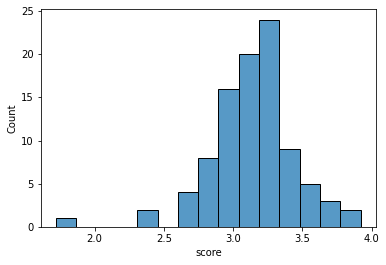

In [2041]:
getHybrdRecommendations(randomUser)

##### recommenditions purely based on content based filtering for the above user

,movieId,score,titles
70,2953,0.668601,The Terminator
23,1544,0.620584,Maggie
0,1240,0.442916,The Hunger Games: Mockingjay - Part 1
24,4638,0.431000,Terminator 2: Judgment Day
26,3256,0.350359,The Tailor of Panama
...,...,...,...
13,48414,0.122978,Maurice
45,50160,0.119660,Mickey Blue Eyes
7,377,0.115948,Enchanted
39,1282,0.112878,The Queen


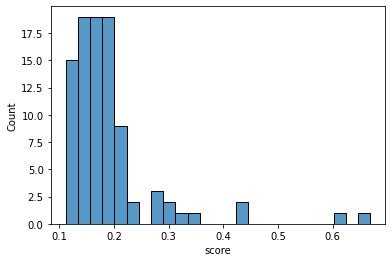

In [2042]:
RecomContent = getContentRecomMovies(randomUser,contentSimilarity)
sns.histplot(RecomContent['score'])
RecomContent